In [1]:
'''
This file is designed for the homework 1 of AIT 736;
Author: Xu He
Date: 2019.Sep.15
Content: KNN algorithm for classifying English letter.
'''

'\nThis file is designed for the homework 1 of AIT 736;\nAuthor: Xu He\nDate: 2019.Sep.15\nContent: KNN algorithm for classifying English letter.\n'

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# read data from document
filename = 'letter-recognition.csv'
col_name = ['label','f0','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15']
data = pd.read_csv(filename,',',None,None,col_name)
#data.head()

# reshape data
#labelvecotr = np.array(data['label'])
#featurename = col_name[1:]
#featurematrix = np.array(data[featurename])
#print(labelvecotr[0:5])
#print(featurematrix[0:5])

# divide the whole data into trainning data and test data
# for trainning data


In [13]:
label,feature = data.iloc[:,0],data.iloc[:,1:]
label_train,label_test,fea_train,fea_test = train_test_split(label,feature,test_size = 0.25)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(fea_train,label_train)
score = knn_model.score(fea_test,label_test)
print(score)
#result = cross_val_score(knn_model,feature,label,cv=10)

0.9476


In [15]:
#print(result)
#print(result.mean())

In [16]:
from imblearn.under_sampling import CondensedNearestNeighbour

# Apply Condensed Nearest Neighbours
cnn = CondensedNearestNeighbour(return_indices=True)
X_resampled, Y_resampled, idx_resampled = cnn.fit_sample(fea_train, label_train)

In [17]:
print(X_resampled[0:5])
print(len(X_resampled))

[[ 5  6  7  5  6  6  6  3  5  7  8 10  8 11  3  8]
 [ 5  9  5  5  3 10  2  4  2 11  5 12  5  3  5 10]
 [ 5 11  8  8  5  9  3  2  3  8  1  8  2  7  3  7]
 [ 3  2  5  3  2  6  2  2  1  5  2  8  2  7  3  5]
 [ 3  8  5  6  2 11  2  4  3 11  2 10  2  6  3  8]]
1744


In [18]:
Inn_model = KNeighborsClassifier(n_neighbors=1)
Inn_model.fit(X_resampled, Y_resampled)
score1 = Inn_model.score(fea_test,label_test)

In [19]:
print(score1)
#下一步，比较它们之间的计算时间

0.82


In [20]:
Score = []
K = list(range(1,21))
for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(fea_train,label_train)
    Score.append(knn_model.score(fea_test,label_test))
print(Score)

[0.963, 0.9476, 0.955, 0.9524, 0.9562, 0.9546, 0.9518, 0.9502, 0.946, 0.9452, 0.9452, 0.9428, 0.9414, 0.9382, 0.9374, 0.9388, 0.9354, 0.9338, 0.9316, 0.931]


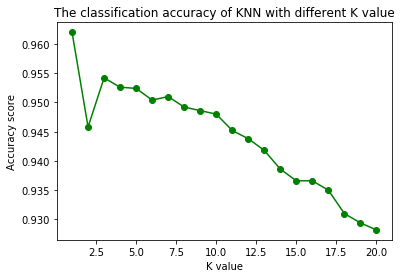

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(K, Score, color='green', marker='o', linestyle='solid')
plt.title('The classification accuracy of KNN with different K value')
plt.xlabel('K value')
plt.ylabel('Accuracy score')
plt.show()